In [1]:
import warnings
warnings.warn = lambda *a, **kw: False

In [2]:
#In this tutorial, I will talk about Ridge and Lasso
#they are techniques used to fix overfitting problem for LinearRegression

In [3]:
#How they work?
#Ridge and Lasso work in the same way by trying to minimize the magnitudes of coefficients

In [4]:
#Let's see how coefficient magnitudes affect the model complexity

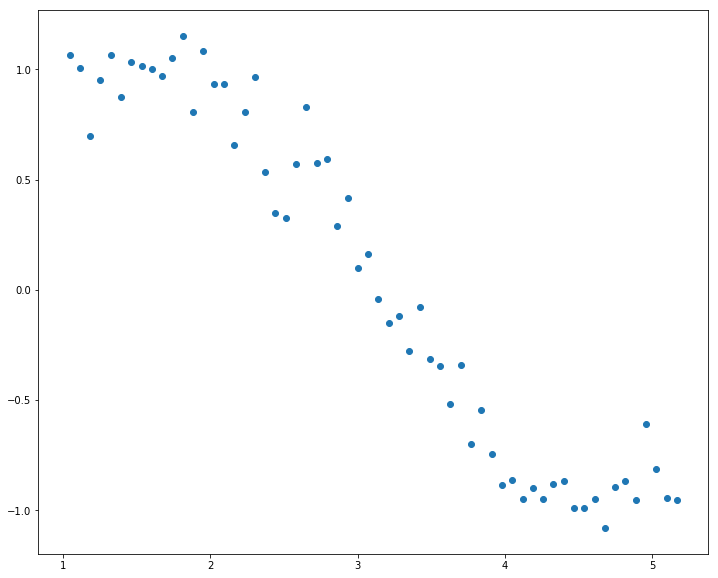

In [5]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#generate X, Y
x = np.array([i*np.pi / 180 for i in range(60, 300, 4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0, 0.15, len(x))

data = pd.DataFrame(np.c_[x, y], columns=['x', 'y'])
plt.scatter(data["x"], data['y'])

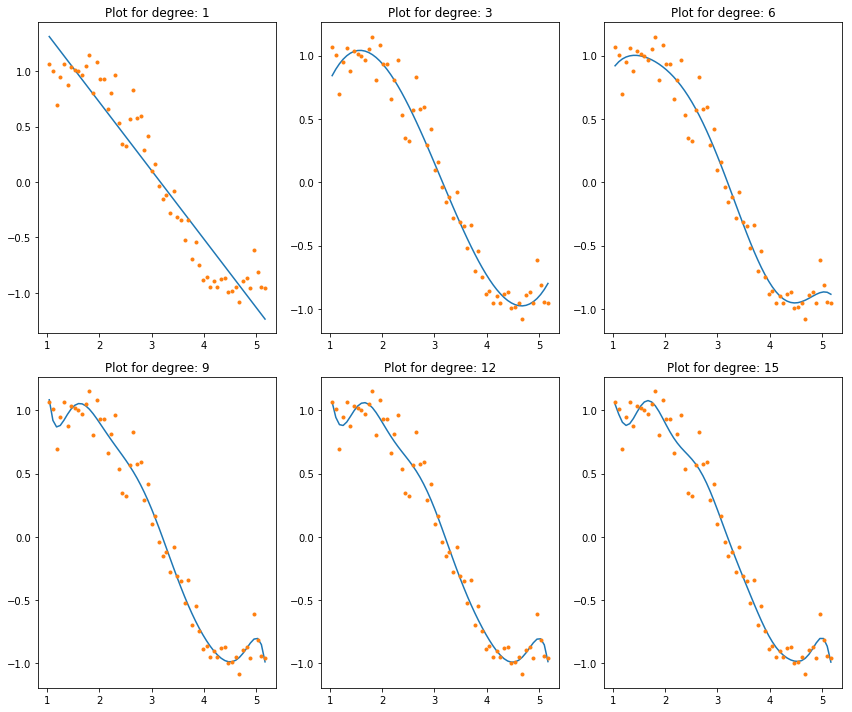

In [6]:
#next, I train 15 polynomial regressions with the degree from 1 to 15 and look at their coefficients
rcParams['figure.figsize'] = 12, 10
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
for i in range(2, 16):
    column = 'x_%d'%i
    data[column] = data['x'] ** i

def poly_regression(degree, models_to_plot):
    features = ['x']
    if(degree >= 2):
        features.extend(['x_%d'%i for i in range(2, degree+1)])
    
    lin_reg = LinearRegression()
    lin_reg.fit(data[features], data['y'])
    y_pred = lin_reg.predict(data[features])
    
    
    if degree in models_to_plot:
        plt.subplot(models_to_plot[degree])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for degree: %d'%degree)
    
    rss = sum((data['y'] - y_pred)**2)
    result = [rss]
    result.extend([lin_reg.intercept_])
    result.extend(lin_reg.coef_)
    return result

#prepare dataframe to hold results of each model
col = ['rss', 'intercept'] + ['x_%d'%i for i in range(1, 16)]
indices = ['model_degree%d'%i for i in range(1, 16)]
df = pd.DataFrame(index=indices, columns=col)

models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

for i in range(1, 16):
    result = poly_regression(i, models_to_plot)
    df.iloc[i-1,0:i+2] = result

In [7]:
#look at plotted model, as degree number increase the model complexity also increase

In [8]:
df

,rss,intercept,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
model_degree1,3.28032,1.96286,-0.619575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree2,3.27668,1.91406,-0.582551,-0.00595874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree3,1.10335,-1.0807,3.03157,-1.28553,0.137292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree4,1.07858,-0.265704,1.68692,-0.531752,-0.0356785,0.0139192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree5,1.01857,2.9915,-5.11776,4.72461,-1.92856,0.334735,-0.0206533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree6,0.990074,-2.80155,9.51665,-9.7132,5.22609,-1.55489,0.233099,-0.0136132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree7,0.928265,19.3021,-55.9523,68.9562,-44.6319,16.5148,-3.52814,0.40451,-0.0192269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree8,0.91761,43.1676,-137.013,183.825,-133.499,57.6767,-15.2527,2.41654,-0.210019,0.00767667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_degree9,0.874941,167.835,-614.513,963.403,-846.437,460.905,-161.849,36.7577,-5.2208,0.421902,-0.0148148,NaN,NaN,NaN,NaN,NaN,NaN
model_degree10,0.874578,137.717,-486.125,726.133,-595.881,293.256,-87.4563,14.5462,-0.806073,-0.138205,0.0262231,-0.00132096,NaN,NaN,NaN,NaN,NaN


In [9]:
#see? as model complexity increase the magnitudes of each coefficient are also increase
#So... If you want to reduce model complexity you need you minimize the model's coeffients 

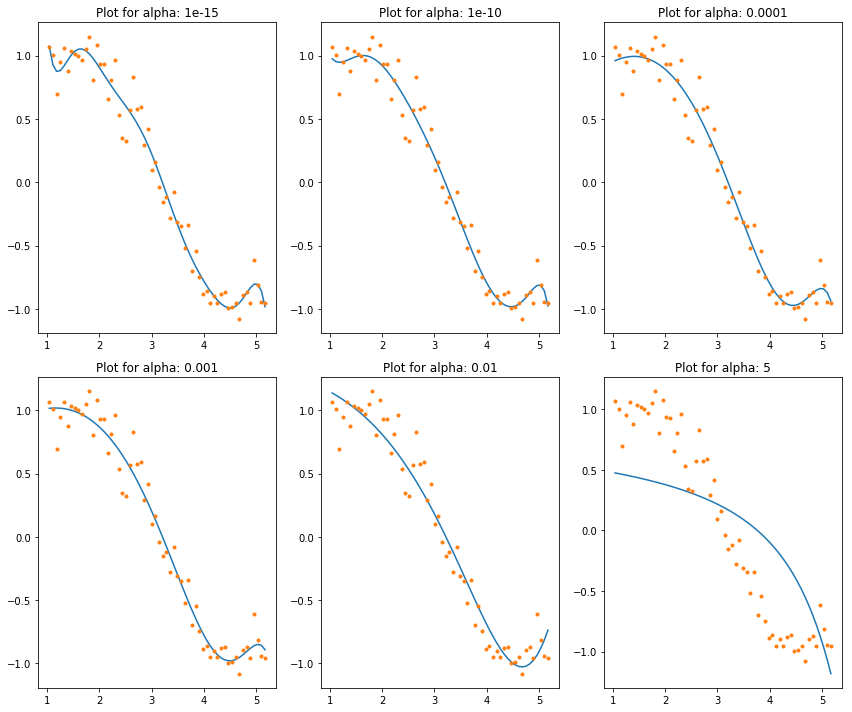

In [10]:
#next, let's train Ridge Regression model

#Ridge Regression regularize model by adding sum of squared coefficients to objective function that model try to minimize
#like this, Objective = RSS + a(sum of squared coefficients)
#parameter 'a' is used to control the weight between (minimize RSS or 'sum of squared cofficients')
#a = 0 means you are not try to minimize  coefficient magnitudes (like LinearRegression)
#a = ∞ means you only minimize coefficient magnitudes. so, this makes all coefficents 0 ()

from sklearn.linear_model import Ridge
features = ['x'] + ['x_%d'%i for i in range(2, 16)]

def ridge_regression(a, models_to_plot):
    ridge_reg = Ridge(alpha = a, normalize=True)
    ridge_reg.fit(data[features], data['y'])
    y_pred = ridge_reg.predict(data[features])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[a])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%a)
    
    
    rss = sum((data['y'] - y_pred)**2)
    result = [rss]
    result.extend([ridge_reg.intercept_])
    result.extend(ridge_reg.coef_)
    return result

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

col = ['rss', 'intercept'] + features
ind = ['model_%.2g'%alpha for alpha in alpha_ridge]
coef_df = pd.DataFrame(index = ind, columns = col)

for i, alpha in enumerate(alpha_ridge):
    result = ridge_regression(alpha, models_to_plot)
    coef_df.iloc[i,:] = result
    

In [11]:
#as the alpha increases, model complexity reduces
coef_df

,rss,intercept,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
model_1e-15,0.873106,94.3086,-298.286,378.345,-236.477,67.7631,-1.17314,-3.69304,0.304958,0.189058,-0.0214981,-0.00767798,0.00105963,0.000246367,-6.34576e-05,4.6091e-06,-9.00558e-08
model_1e-10,0.922601,11.1701,-28.9629,31.0694,-15.2353,2.89182,0.169364,-0.0910019,-0.0108383,0.00198378,0.00063697,2.40845e-05,-2.00113e-05,-4.2037e-06,2.19352e-07,2.2729e-07,-2.33741e-08
model_1e-08,0.949292,1.33999,-1.53065,1.74946,-0.680458,0.038843,0.0158179,0.00015918,-0.00035954,-5.37182e-05,-2.91013e-07,1.08091e-06,1.89389e-07,1.96191e-08,3.92864e-09,8.19001e-10,-4.62722e-10
model_0.0001,0.962018,0.56132,0.546549,-0.128142,-0.025713,-0.00282024,-0.000110299,4.0575e-05,1.52075e-05,3.65239e-06,7.36585e-07,1.30351e-07,1.9445e-08,1.93533e-09,-1.30259e-10,-1.54943e-10,-6.17707e-11
model_0.001,1.00178,0.817638,0.305147,-0.0866873,-0.0204755,-0.00283643,-0.000219199,1.81203e-05,1.2399e-05,3.42971e-06,7.28224e-07,1.29346e-07,1.86865e-08,1.70622e-09,-1.5108e-10,-1.40448e-10,-5.16034e-11
model_0.01,1.43579,1.29889,-0.0883959,-0.0515001,-0.010099,-0.00141244,-0.000131521,7.23082e-07,4.13617e-06,1.30478e-06,2.96417e-07,5.6157e-08,8.97185e-09,1.09406e-09,4.29249e-11,-3.14226e-11,-1.48705e-11
model_1,5.64874,0.968886,-0.139008,-0.019268,-0.00300434,-0.000465519,-6.97006e-05,-9.90064e-06,-1.29236e-06,-1.42846e-07,-9.33025e-09,1.30688e-09,7.8035e-10,2.40231e-10,6.15627e-11,1.44581e-11,3.22713e-12
model_5,13.8383,0.54826,-0.0588687,-0.00852167,-0.00141945,-0.000241004,-4.08318e-05,-6.87431e-06,-1.14898e-06,-1.90534e-07,-3.13146e-08,-5.09188e-09,-8.16953e-10,-1.28804e-10,-1.98296e-11,-2.95006e-12,-4.16233e-13
model_10,18.0248,0.400342,-0.0372364,-0.00552679,-0.000949634,-0.000167292,-2.95811e-05,-5.23032e-06,-9.24527e-07,-1.63445e-07,-2.89111e-08,-5.11838e-09,-9.07113e-10,-1.60954e-10,-2.85942e-11,-5.08624e-12,-9.05846e-13
model_20,22.7205,0.276703,-0.0224693,-0.00340492,-0.000599344,-0.000108458,-1.9744e-05,-3.60077e-06,-6.57576e-07,-1.2028e-07,-2.20428e-08,-4.04814e-09,-7.45085e-10,-1.37447e-10,-2.54123e-11,-4.70877e-12,-8.7438e-13


In [12]:
#as you can see the alpha increase, rss reduces, also coefficient magnitudes reduces to very very small but not ZERO
#let's count the number of coefficints which is zero
coef_df.apply(lambda x: sum(x.values == 0))

rss          0
intercept    0
x            0
x_2          0
x_3          0
x_4          0
x_5          0
x_6          0
x_7          0
x_8          0
x_9          0
x_10         0
x_11         0
x_12         0
x_13         0
x_14         0
x_15         0
dtype: int64

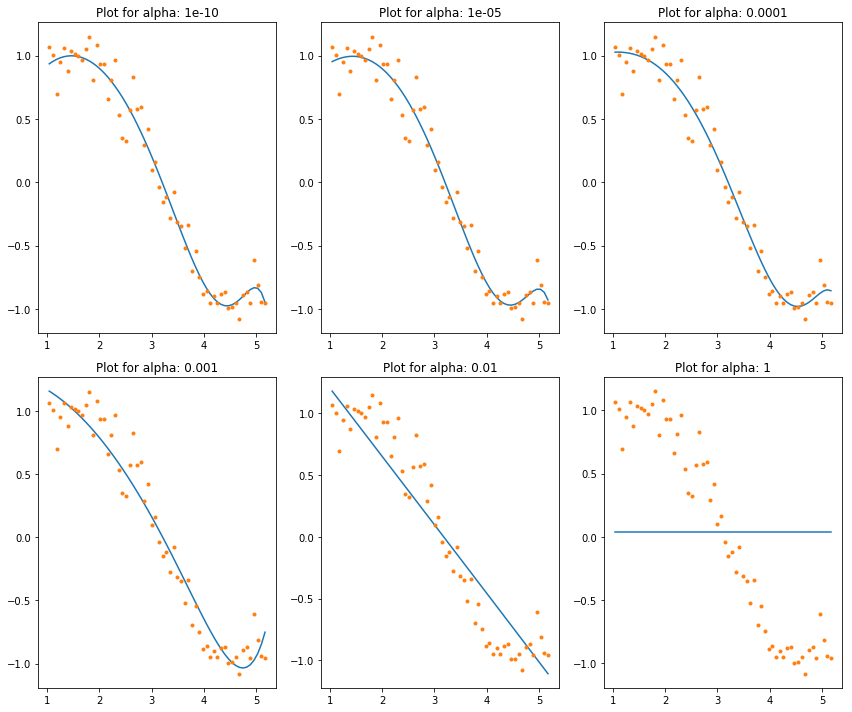

In [13]:
#next, let's look at Lasso Regression
#LassoRegression works the same way as RidgeRegression which is it try to reduce model complexity by reduce the coefficient magnitude
#LassoRegression are controled by 'alpha', a parameter which control the weight of reducing coefficient magnitudes

from sklearn.linear_model import Lasso

def lasso_regression(a, models_to_plot):
    lasso_reg = Lasso(alpha = a, normalize=True, max_iter=1e5)
    lasso_reg.fit(data[features], data['y'])
    y_pred = lasso_reg.predict(data[features])
    
    if a in models_to_plot:
        plt.subplot(models_to_plot[a])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%a)
    
    rss = sum((y_pred - data['y'])**2)
    result = [rss]
    result.extend([lasso_reg.intercept_])
    result.extend(lasso_reg.coef_)
    
    return result

models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
col = ['rss', 'intercept'] + features
ind = ['model_%.2g'%alpha for alpha in alpha_lasso]
coef_df = pd.DataFrame(index=ind, columns=col)

for i,alpha in enumerate(alpha_lasso):
    result = lasso_regression(alpha, models_to_plot)
    coef_df.iloc[i,:] = result
    

In [14]:
#as alpha increase, model complexity increase

In [15]:
coef_df

,rss,intercept,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
model_1e-15,0.956715,0.222238,1.06464,-0.369048,0.000885176,0.00163313,-0.000118539,-6.43874e-05,-6.27554e-06,1.44874e-06,7.82079e-07,2.0758e-07,3.98135e-08,5.35996e-09,1.81973e-10,-1.9545e-10,-9.23654e-11
model_1e-10,0.956715,0.222239,1.06463,-0.369044,0.000884005,0.00163297,-0.000118453,-6.43884e-05,-6.27604e-06,1.44856e-06,7.82087e-07,2.07577e-07,3.98123e-08,5.35972e-09,1.82126e-10,-1.95439e-10,-9.23689e-11
model_1e-08,0.956708,0.222374,1.06416,-0.368607,0.000768994,0.00161624,-0.000109896,-6.44771e-05,-6.32441e-06,1.43063e-06,7.83012e-07,2.07335e-07,3.96964e-08,5.33557e-09,1.96e-10,-1.94185e-10,-9.2727e-11
model_1e-05,0.961296,0.50422,0.604311,-0.12811,-0.0382162,-0,0,0,0,7.72717e-06,1.00329e-06,7.72549e-08,0,0,0,-0,-6.95047e-11
model_0.0001,1.03263,0.903041,0.1711,-0,-0.0477801,-0,-0,0,0,9.46534e-06,5.09953e-07,0,0,0,-0,-0,-4.40439e-11
model_0.001,1.67883,1.29462,-0,-0.126087,-0,-0,-0,0,0,0,0,0,1.49606e-08,7.52631e-10,0,0,0
model_0.01,3.63907,1.75938,-0.552066,-0.000562323,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
model_1,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
model_5,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
model_10,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [16]:
#the difference between Ridge and Lasso is that some coefficients in Lasso can be zeros
#let's count the number of zeros in model coefficients
coef_df.apply(lambda x: sum(x.values==0))

rss          0
intercept    0
x            4
x_2          4
x_3          5
x_4          7
x_5          7
x_6          7
x_7          7
x_8          5
x_9          5
x_10         6
x_11         6
x_12         6
x_13         7
x_14         7
x_15         5
dtype: int64

In [17]:
#Lasso performs feature selection

In [18]:
#Choose Ridge or Lasso?
#if your data set has many features(says a million) you should choose Lasso because it reduce computational cost
#Ridge are perform well on highly correlated feature because it doesn't discard any feature.
##but sizes of each coefficient magnitude depend on the correlation
#Lasso, on the other hand, if our data are highly correlated it will discard some features that makes our model could lose
##some significant informations 

##conclude
#In case of your data has very hight number of feature: Lasso outperform Ridge
#In case of you data are highly correlated: Ridge ourperform Lasso

In [19]:
#Elastic Net
#Elastic Net is a middle ground between Ridge and Lasso, it performs both L1 and L2 regularization
#parameter 'r' are used to control the mixing ratio, if r = 1 it is equivalent Ridge Regression 
#and if = 0 it is equivalent Lasso Regression
#parameter 'a' control the weight of minimizing coefficient magnitudes

from sklearn.linear_model import ElasticNet